### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

from sklearn.feature_selection import SelectKBest,chi2
sns.set()

## Chi Square Test
  - Chi square test is used for categorical features in a daraset
  - we calculate Chi-square between each feature and target and select the desired number of features with best Chi-square score
  
  |x^2 = (Observed_frequency - Expected_frequency)^2 / Expected_frequency
  
### Intuition

- In feature selection,we aim to select the features which are highly dependent on the response.When two features are independent,the observed count is close to the expected count,thus we will have similar Chi-square value.So high Chi-square value indicates that the hypothesis of independence is incorrect.
- In simple words,higher the chi-square value the feature is more dependent on the response and it can be selected for model training
  

### Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\ML\Data Dimensionality\global_heat_index.csv')
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


In [4]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


### Cleaning Data

In [5]:
## Hours where solar radiation is zero
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

In [6]:
clean1.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [7]:
clean2.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971374,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [8]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [9]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9490 entries, 6 to 17514
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9490 non-null   int64  
 1   Month                  9490 non-null   int64  
 2   Day                    9490 non-null   int64  
 3   Hour                   9490 non-null   int64  
 4   Dew Point              9490 non-null   int64  
 5   Temperature            9490 non-null   float64
 6   Pressure               9490 non-null   float64
 7   Relative Humidity      9490 non-null   float64
 8   Wind Direction         9490 non-null   float64
 9   Wind Speed             9490 non-null   float64
 10  Solar Radiation (GHI)  9490 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 889.7 KB


### Preparing input and output data

In [11]:
x = data.iloc[:,0:10]
y = data.iloc[:,-1]

In [12]:
x.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695


In [13]:
y.head()

6       0
7       0
8     159
9     363
10    533
Name: Solar Radiation (GHI), dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit(x).transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


# <font color="green">Feature Selection with KBest Method using Chi Square Test</font>

In [15]:
best_features = SelectKBest(score_func = chi2, k=10)

fit = best_features.fit(x,y)

In [26]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(data.columns[:-1])

In [27]:
feature_score = pd.concat([column,scores],axis=1)
feature_score.columns = ['Fearture','Score']
feature_score

,Fearture,Score
0,Year,504.976721
1,Month,236.303859
2,Day,208.497847
3,Hour,271.978728
4,Dew Point,74.952667
5,Temperature,306.062548
6,Pressure,213.040872
7,Relative Humidity,397.828591
8,Wind Direction,221.823327
9,Wind Speed,148.735716


In [28]:
feature_score.nlargest(10,'Score')

,Fearture,Score
0,Year,504.976721
7,Relative Humidity,397.828591
5,Temperature,306.062548
3,Hour,271.978728
1,Month,236.303859
8,Wind Direction,221.823327
6,Pressure,213.040872
2,Day,208.497847
9,Wind Speed,148.735716
4,Dew Point,74.952667


### Visualization

<AxesSubplot:>

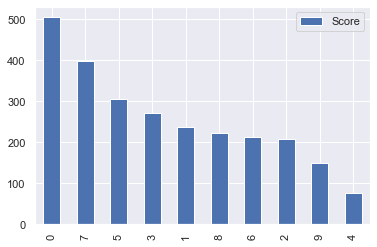

In [43]:
feature_score.nlargest(10,'Score').plot(kind='bar')